In [16]:
from IPython.display import Image

-----------------------------------
### "Mastering Sequence modeling - RNN explained"

#### Using Keras (SimpleRNN)  
--------------------------------------

- To Understand `return state` and `return sequences`


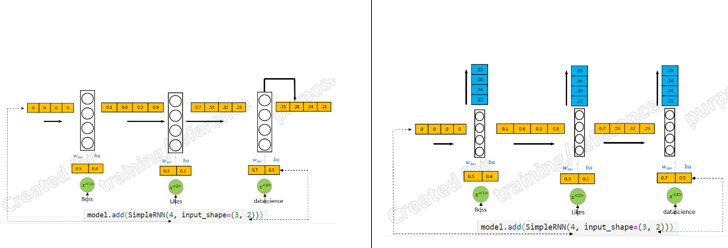

**Outline**

In the context of sequence modeling with Recurrent Neural Networks (RNNs), understanding the concepts of "return state" and "return sequences" is crucial. When using an RNN to process sequential data, such as time series or natural language sequences, the network can be configured to either return only the final hidden state after processing the entire input sequence ("return state") or return the hidden states at each time step throughout the sequence ("return sequences").

The "return state" option is often employed when the ultimate goal of the model is to capture and utilize only the information learned from the entire input sequence. In this case, the RNN outputs a single vector representing the aggregated knowledge of the entire sequence, which can be useful for tasks where the sequential context is distilled into a compact representation.

On the other hand, the "return sequences" option is selected when maintaining the sequential information at each time step is essential. This configuration allows the RNN to output a sequence of hidden states corresponding to each input time step. This is particularly beneficial when the temporal dynamics of the data play a crucial role, such as in predicting the next element in a sequence or capturing dependencies between distant elements.

In [5]:
import tensorflow
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN

np.set_printoptions(suppress=True, edgeitems=20, precision=6, linewidth=100)

#### arguments in SimpleRNN

|Arg name | Description|
|---------| -----------|
|units: |Positive integer, dimensionality of the output space.|
|activation: |Activation function to use. Default: hyperbolic tangent (tanh). If you pass None, no activation is applied (ie. "linear" activation: a(x) = x).|
|use_bias: |Boolean, (default True), whether the layer uses a bias vector.|
|kernel_initializer: |Initializer for the kernel weights matrix, used for the linear transformation of the inputs. Default: `glorot_uniform.`|
|recurrent_initializer: |Initializer for the recurrent_kernel weights matrix, used for the linear transformation of the recurrent state. Default: `orthogonal.`|
|bias_initializer: |Initializer for the bias vector. Default: zeros.|
|kernel_regularizer: |Regularizer function applied to the kernel weights matrix. `Default: None`.|
|recurrent_regularizer: |Regularizer function applied to the recurrent_kernel weights matrix. `Default: None`.|
|bias_regularizer: |Regularizer function applied to the bias vector. `Default: None`.|
|activity_regularizer: |Regularizer function applied to the output of the layer (its "activation"). Default: None.|
|kernel_constraint: |Constraint function applied to the kernel weights matrix. `Default: None`.|
|recurrent_constraint: |Constraint function applied to the recurrent_kernel weights matrix. Default: None.|
|bias_constraint: |Constraint function applied to the bias vector. Default: None.|
dropout: Float between 0 and 1. Fraction of the units to drop for the linear transformation of the inputs. Default: 0.
|recurrent_dropout: |Float between 0 and 1. Fraction of the units to drop for the linear transformation of the recurrent state. `Default: 0`.|
|return_sequences: |Boolean. Whether to return the last output in the output sequence, or the full sequence. `Default: False.`|
|return_state: |Boolean. Whether to return the `last state` in addition to the output. `Default: False`|
|go_backwards: |Boolean (default False). If True, process the input sequence backwards and return the reversed sequence.|
|stateful: |Boolean (default False). If True, the last state for each sample at index i in a batch will be used as initial state for the sample of index i in the following batch.|
|unroll: |Boolean (default False). If True, the network will be unrolled, else a symbolic loop will be used. Unrolling can speed-up a RNN, although it tends to be more memory-intensive. Unrolling is only suitable for short sequences.|

#### output of an RNN

- The output of an RNN at each time step is the result of processing the input sequence up to that point. 

- It's the prediction or representation at each step.

$$
y_t=f\left(W_{h x} \cdot x_t+W_{h h} \cdot h_{t-1}+b_h\right)
$$
where:
- $W_{h x}$ is the weight matrix for the input-to-hidden connections,
- $W_{h h}$ is the weight matrix for the hidden-to-hidden connections,
- $b_h$ is the bias term, and
- $f$ is an activation function.

#### Hidden State

- The hidden state of an RNN is a vector that encapsulates information about the sequence seen so far. 
- It serves as the `memory of the network`, capturing relevant information to make predictions based on the context.

The hidden state $h_t$ computed at time step $t$ is then used in the next time step $(t+1)$.

The process repeats for each time step in the sequence, and the final output is often used for tasks such as sequence prediction or classification.

#### Return states

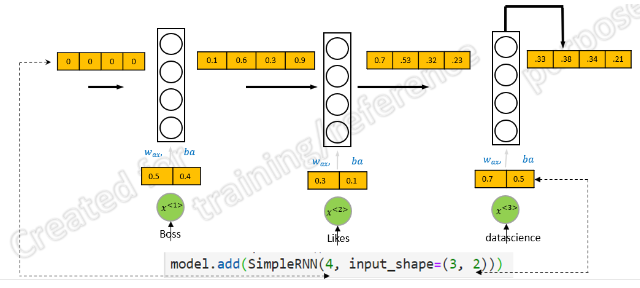

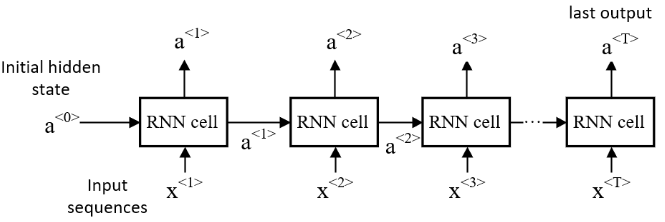

In the graph above we can see given an input sequence to an RNN layer, `each RNN cell` related to `each time step` will generate output known as the hidden state, $a^{<t>}$.

#### Return sequences

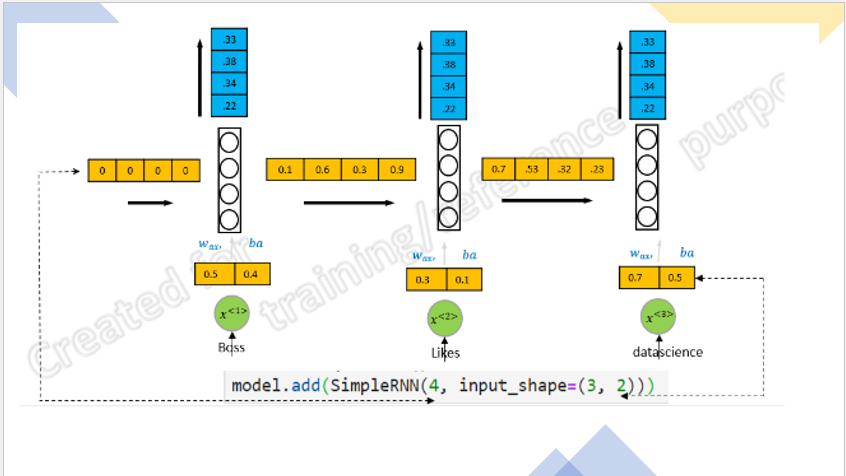

- `Return sequences` refer to return the hidden state $a^{<t>}$. 

- By default, the `return_sequences` is set to `False` in Keras RNN layers, and this means the RNN layer will only return the `last hidden state output` $a^{<T>}$. 

- The `last hidden state output` captures an abstract representation of the input sequence. 

    - In some case, it is all we need, such as a `classification` or `regression` model where the RNN is followed by the Dense layer(s) to generate logits for news topic classification or score for sentiment analysis, or in a generative model to produce the softmax probabilities for the next possible char.

    - In other cases, we need the full sequence as the output. Setting `Return_sequences` to `True` is necessary.

#### Example (on return sequences = True and False)

**data setup for SimpleRNN**

- `input_shape=(3, 2)`:

    - We have 4 words: _Jai_, _likes_, _AI_. 
    - So, number of time-steps is 3. 
    - The RNN block unfolds 3 times, and so we see 3 RNN blocks .
    - For each word, we pass the word embedding of size 2 to the network.

- `SimpleRNN(7, …)`:
    - 7 units in the hidden layer.
    - hidden state of size 7 is passed between the RNN blocks
    - For the first block, since there is no previous output, so previous hidden state is set to [0, 0, 0, 0, 0, 0, 0]
    - Thus for a whole sentence, we get a vector of size 7 as output from the RNN layer

In [6]:
# samples   = 2
# sequences = 3 for each sample, number of time steps (number of words in a sentence)
# features  = 2 for each sequence step (time step)

nbr_samples   = 2
nbr_timesteps = 3
nbr_features  = 2

inputs = np.random.random([nbr_samples, nbr_timesteps, nbr_features]).astype(np.float32)
inputs

array([[[0.959196, 0.921926],
        [0.946755, 0.315722],
        [0.210483, 0.50017 ]],

       [[0.409041, 0.566361],
        [0.068845, 0.08952 ],
        [0.210525, 0.565604]]], dtype=float32)

``return_sequences``

In [7]:
memory_len = 4

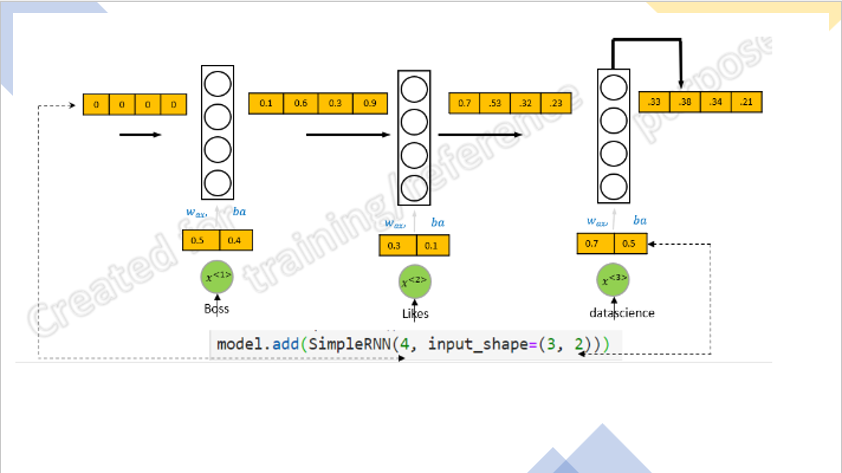

In [8]:
# model with no return sequences
model1 = Sequential()
model1.add(SimpleRNN(units=memory_len, return_sequences=False))

output1 = model1(inputs)

output1.numpy() 

# no return sequences, only the final output, (hidden state or memory/context)
# this is useful in applications like text classification or sentiment analysis

array([[ 0.610244, -0.519958,  0.840869,  0.041584],
       [ 0.571826,  0.081541,  0.496142, -0.156394]], dtype=float32)

The output corresponds to the final hidden state of the RNN for `each sample` in the input sequence.

Note : 
1. when you move from one sample to the next, the `hidden state` is typically `reset` or initialized based on the initial state configuration.

2. In the case of the Keras Sequential model, the `hidden state` is initialized to zeros at the beginning of each sample.

``what these output signify?``

1. Input-to-hidden computation:
$a_t=W_{i h} \cdot x_t+b_h$
2. Hidden-to-hidden computation:
$h_t=f\left(a_t+W_{h h} \cdot h_{t-1}\right)$
3. Output computation (if 'return_sequences=False '):
$y_t=h_t$

In the formulas above:
- $a_t$ is the input to the activation function,
- $h_{t-1}$ is the hidden state from the previous time step,
- $y_t$ is the output at time step $t$.

The activation function $f$ is typically a non-linear function such as the hyperbolic tangent (`tanh`) or the rectified linear unit (`ReLU`).

In [9]:
# model with return sequences
model2 = Sequential()
model2.add(SimpleRNN(units=memory_len, return_sequences=True))

output2 = model2(inputs)

output2.numpy()

# all sequences

array([[[ 0.21529 , -0.449264,  0.926816,  0.76329 ],
        [ 0.381533,  0.099032,  0.225251,  0.682142],
        [ 0.009697,  0.469669,  0.0451  ,  0.433505]],

       [[ 0.206777, -0.159901,  0.686493,  0.472221],
        [ 0.361352,  0.525712, -0.345596,  0.218995],
        [-0.407876,  0.196429,  0.611507,  0.405979]]], dtype=float32)

In [87]:
#model1.count_params(), model2.count_params()

#### Example (on return_states = True and False)

`return_sequences=False, return_state=False`

In [10]:
# model with no return sequences, no return state
model1 = Sequential()
model1.add(SimpleRNN(units=memory_len, return_sequences=False, return_state=False))

output1 = model1(inputs)

output1

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[-0.029636, -0.457997, -0.700799, -0.395222],
       [ 0.062123, -0.216674, -0.72893 , -0.756414]], dtype=float32)>

By default, the Sequential model in Keras will `only return the final output of the last layer` when calling model.predict() or a similar method.

`return_sequences=False, return_state=True`

In [101]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import SimpleRNN, Input

In [102]:
input_layer           = Input(shape=(nbr_timesteps, nbr_features))  # Adjust input shape based on your data

rnn_output, rnn_state = SimpleRNN(units=memory_len, return_sequences=False, return_state=True)(input_layer)

model2                = Model(inputs=input_layer, outputs=[rnn_output, rnn_state])

model2.predict(inputs)

1/1 [==============================] - 0s 392ms/step


[array([[-0.09382 , -0.899443,  0.195807,  0.853516],
        [-0.323967, -0.804151,  0.277451,  0.847184]], dtype=float32),
 array([[-0.09382 , -0.899443,  0.195807,  0.853516],
        [-0.323967, -0.804151,  0.277451,  0.847184]], dtype=float32)]

- output is a list containing two NumPy arrays

- First Array (index 0):

    - Shape: (2, 4)
    - Content: This array represents the final hidden state for each sample in your input sequence. Each row corresponds to the final hidden state of one sample. 
        - For example, the `first row` [-0.498298, 0.498498, -0.74931 , 0.435047] represents the final hidden state for the `first sample`.

- Second Array (index 1):

    - Shape: (2, 4)
    - Content: This array represents the `entire sequence of hidden states` for each sample in your input sequence. Each row corresponds to the sequence of hidden states for one sample. 
        - In this case, since `return_sequences=False`, each row is identical to the final hidden state. 
        - The second row [-0.311808, 0.456626, -0.6619 , 0.25658 ] represents the sequence of hidden states for the second sample.

So, to summarize:

- The first array gives you the final hidden state for each sample.

- The second array gives you the entire sequence of hidden states for each sample, but since return_sequences=False, each sequence is identical and represents the final hidden state.

In both cases, the hidden states are represented as vectors with four (memory_len) elements. These vectors contain the learned representations of the input sequences by the SimpleRNN layer.

`return_sequences=True, return_state=True`

In [103]:
input_layer           = Input(shape=(nbr_timesteps, nbr_features))  # Adjust input shape based on your data

rnn_output, rnn_state = SimpleRNN(units=memory_len, return_sequences=True, return_state=True)(input_layer)

model2                = Model(inputs=input_layer, outputs=[rnn_output, rnn_state])

model2.predict(inputs)

1/1 [==============================] - 0s 296ms/step


[array([[[ 0.560691, -0.123423, -0.425304,  0.543845],
         [-0.260958, -0.158895, -0.484799,  0.47429 ],
         [ 0.066162,  0.145159, -0.698336,  0.122008]],
 
        [[ 0.178255, -0.021097, -0.165175,  0.171531],
         [ 0.32975 , -0.127216, -0.418475,  0.506601],
         [-0.298486, -0.048781, -0.469822,  0.258246]]], dtype=float32),
 array([[ 0.066162,  0.145159, -0.698336,  0.122008],
        [-0.298486, -0.048781, -0.469822,  0.258246]], dtype=float32)]

- First Array (index 0):

    - Shape: (2, 3, 4)
    - Content: This array represents the sequences of hidden states for each sample in your input sequence. The shape (2, 3, 4) indicates that you have 2 samples, each with a sequence of length 3, and each hidden state vector has 4 elements.
        - Example: The first sample's sequence of hidden states is given by the first row 
            - [[ -0.700571, 0.498738, 0.597688, 0.123061], 
               [-0.669619, -0.489447, 0.763688, 0.236938], 
               [-0.046851, -0.032045, 0.88603 , 0.08398 ]].
               
- Second Array (index 1):

    - Shape: (2, 4)
    - Content: This array represents the final hidden state for each sample in your input sequence. The shape (2, 4) indicates that you have 2 samples, and each hidden state vector has 4 elements.
        - Example: The first sample's final hidden state is given by the first row [-0.046851, -0.032045, 0.88603 , 0.08398].

-------------------------------
#### End
--------------------------------

In [18]:
from keras.layers import Input
from keras.models import Model

In [19]:
# define model
inputs1 = Input(shape=(3, 2))

rnn_layer = SimpleRNN(units=1, return_sequences=True)(inputs1)
model     = Model(inputs=inputs1, outputs=rnn_layer)

# define input data
data = np.array([0.1, 0.2, 0.3, 0.1, 0.2, 0.3]).reshape((1,3,2))
data

array([[[0.1, 0.2],
        [0.3, 0.1],
        [0.2, 0.3]]])

In [41]:
# make and show prediction
output = model.predict(data)
print(output )
output.shape

1/1 [==============================] - 2s 2s/step
[[[ 0.25]
  [-0.11]
  [ 0.46]]]


(1, 3, 1)

In [113]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 3, 2)]            0         
_________________________________________________________________
simple_rnn_34 (SimpleRNN)    (None, 3, 1)              4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [118]:
g = 1  # SimpleRNN has 1 computation unit
h = 1  # number of hidden units
i = 2  # input dimension

g * (h*(h+i) + h)

4

##### Example

In [42]:
x = tensorflow.random.normal((1, 3, 2))

layer = SimpleRNN(4, input_shape=(3, 2))
output = layer(x)

print(output.shape)

(1, 4)


we create a random batch of input data with 1 sentence having 3 words and each word having an embedding of size 2. After passing through the RNN layer, we get back representation of size 4 for that one sentence.

This can be combined with a Dense layer to build an architecture for something like sentiment analysis or text classification.

In [43]:
model = Sequential()

model.add(keras.layers.SimpleRNN(4, input_shape=(3, 2)))
model.add(Dense(1))

NameError: name 'Dense' is not defined

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 4)                 28        
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


##### Multiple Output

Keras provides a __return_sequences__ parameter to control output from the RNN cell. 

If we set it to True, what it means is that the output from each unfolded RNN cell is returned instead of only the last cell.

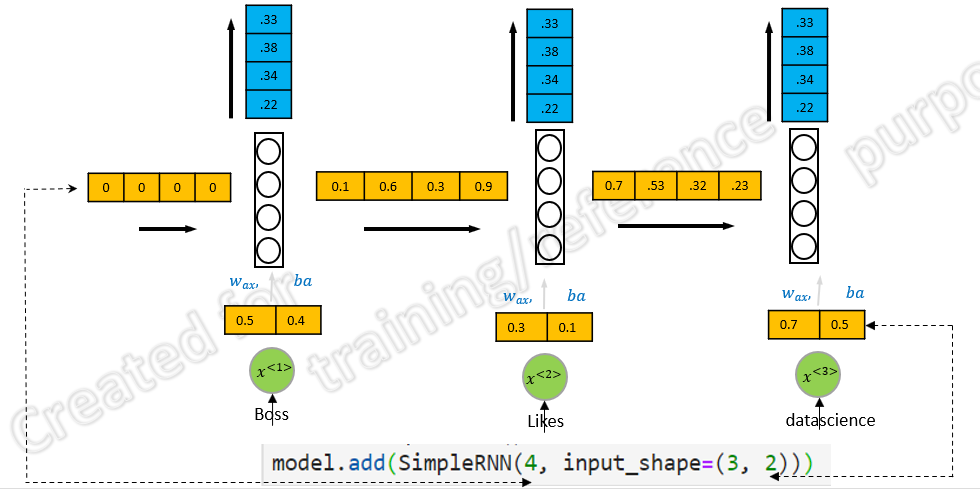

In [43]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\RNN-basics-04.png', width=600)

In [44]:
x = tensorflow.random.normal((1, 3, 2))

model = Sequential()
model.add(SimpleRNN(units=4, input_shape=(3, 2), return_sequences=True))
output = model(x)

print(output.shape)

(1, 3, 4)


In [45]:
model.count_params()

28

In [46]:
g = 1
h = 4
i = 2

g * (h*(h+i) + h)

28

##### 3.3 `Return states`
`Return sequences` refer to return the cell state c<t>. 

In Keras we can output RNN's last cell state in addition to its hidden states by setting `return_state` to True.
    
- For GRU, a<t>=c<t>, so you can get around without this parameter. 
- But for LSTM, hidden state and cell state are not the same.

In [47]:
# samples   = 2
# sequences = 4 for each sample
# features  = 3 for each sequence step (time step)
inputs = np.random.random([2, 4, 3]).astype(np.float32)
inputs

array([[[0.49, 0.62, 0.93],
        [0.51, 0.54, 0.22],
        [0.68, 0.6 , 0.53],
        [0.02, 0.56, 0.11]],

       [[0.14, 0.68, 0.06],
        [0.23, 0.05, 0.73],
        [0.87, 0.37, 0.37],
        [0.38, 0.78, 0.13]]], dtype=float32)

In [49]:
simple_rnn = SimpleRNN(units=5, return_sequences=True, return_state=True)

# final_state has shape `[32, 4]`.
whole_sequence_output, final_state = simple_rnn(inputs)

In [50]:
whole_sequence_output

<tf.Tensor: shape=(2, 4, 5), dtype=float32, numpy=
array([[[-0.12, -0.07,  0.32,  0.05, -0.11],
        [-0.3 , -0.05,  0.22, -0.04,  0.17],
        [-0.07, -0.02,  0.35, -0.14,  0.29],
        [ 0.23, -0.45, -0.03,  0.24,  0.29]],

       [[-0.08, -0.19, -0.32,  0.43,  0.3 ],
        [ 0.28,  0.5 ,  0.52, -0.01, -0.23],
        [-0.39, -0.22,  0.26, -0.35, -0.48],
        [-0.62, -0.35, -0.1 ,  0.15,  0.63]]], dtype=float32)>

In [51]:
final_state

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[ 0.23, -0.45, -0.03,  0.24,  0.29],
       [-0.62, -0.35, -0.1 ,  0.15,  0.63]], dtype=float32)>

##### Single Output (`return_sequences` is set to `False` )

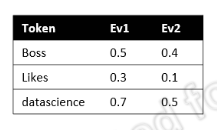

To use this sentence in a RNN, we need to first convert it into numeric form. 

We could either use 
- one-hot encoding, 
- pretrained word vectors or 
- learn word embeddings from scratch. 

For simplicity, let’s assume we used some word embedding to convert each word into 2 numbers.

Now, to pass these words into a RNN, we treat each word as time-step and the embedding as it’s features. Let’s build a RNN layer to pass these into

In [3]:
model = Sequential()

model.add(keras.layers.SimpleRNN(4, input_shape=(3, 2)))

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 4)                 28        
                                                                 
Total params: 28 (112.00 Byte)
Trainable params: 28 (112.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# g = 1
# h = 4
# i = 2

# g * (h*(h+i) + h)

In [142]:
# this wont work, need functional API, not the sequential model with return_state=True
# model = Sequential()
# model.add(SimpleRNN(units=4, return_state=True))

# whole_sequence_output, final_state = model(inputs)